<a href="https://colab.research.google.com/github/Bharatgaur/Trading/blob/main/Trades%20taken%20by%20me%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **My Trade Analysis**

**Libraries**

In [1]:
# importing dependent libraries
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
# Constants defined
BASE_CAPITAL = 25000
PERCENTAGE = 0.40  # 30% of capital
LOT_SIZE = 15  # 15 units per trade
TARGET_PCT = 40
STOPLOSS_PCT = 60
RISK = 20
REWARD = RISK*2.5

In [3]:
# Calculate Transaction Charges
brokerage = 0.01
transaction_charges_pct = 0.03503
stt_pct = 0.1
ipft_pct = 0.0005
stamp_duty_pct = 0.003
sebi_charges_pct = 0.0001
gst_pct = 0.18

In [4]:
# URL of the Google Sheet
sheet_url = "https://docs.google.com/spreadsheets/d/1lSh25UUtPLaZI-BY6TPWFcEoKjA6Kk0LuaWrNKxQ-4Y/export?format=csv"

# Load the data into a pandas DataFrame
df = pd.read_csv(sheet_url)

In [5]:
# # Modify the GitHub URL to access the raw CSV content
# url = "https://raw.githubusercontent.com/Bharatgaur/Trading/main/Options%20Trade%20analysis%20onmarket-transaction.csv"

# # Read the CSV file directly into a DataFrame
# df = pd.read_csv(url)

In [6]:
df

,Trade Date,Order Time,Trade Time,Security Name,Quantity,Buy rate,Sell rate
0,18/10/2023,10:19:36,10:19:36,NIFTY19OCT2023CE19600,50,238.75,234.55
1,19/10/2023,10:17:18,10:17:45,NIFTY19OCT2023PE19700,50,113.00,98.00
2,19/10/2023,10:59:30,11:03:18,NIFTY19OCT2023PE19700,50,120.00,105.05
3,20/10/2023,10:31:13,10:31:13,NIFTY26OCT2023PE19700,50,187.85,176.05
4,20/10/2023,11:38:08,11:38:29,NIFTY26OCT2023CE19300,50,274.00,256.15
...,...,...,...,...,...,...,...
1580,10/10/2024,13:54:07,13:54:31,BANKNIFTY16OCT2024PE51400B,15,320.00,300.00
1581,10/10/2024,13:57:45,13:58:10,BANKNIFTY16OCT2024CE51600,30,380.00,400.00
1582,11/10/2024,10:30:25,10:30:25,BANKNIFTY16OCT2024PE51600,15,380.00,430.00
1583,11/10/2024,10:29:18,10:35:55,SENSEX11OCT2024PE81600,20,175.00,187.45


In [7]:
df.columns

Index(['Trade Date', 'Order Time', 'Trade Time', 'Security Name', 'Quantity',
       'Buy rate', 'Sell rate'],
      dtype='object')

In [8]:
# columns_to_keep = [
#     'Trade Date', 'Order Time', 'Trade Time',
#     'Security Name', 'Quantity', 'Buy rate', 'Sell rate'
# ]
# df = df[columns_to_keep]
# df

In [9]:
# df.info()

In [10]:
# Adding three columns to my dataframe Buy Value, Sell Value and PnL
df.loc[:, 'Buy Value'] = df['Quantity'] * df['Buy rate']
df.loc[:, 'Sell Value'] = df['Quantity'] * df['Sell rate']
df.loc[:, 'PnL'] = df['Sell Value'] - df['Buy Value']

In [11]:
df

,Trade Date,Order Time,Trade Time,Security Name,Quantity,Buy rate,Sell rate,Buy Value,Sell Value,PnL
0,18/10/2023,10:19:36,10:19:36,NIFTY19OCT2023CE19600,50,238.75,234.55,11937.5,11727.5,-210.0
1,19/10/2023,10:17:18,10:17:45,NIFTY19OCT2023PE19700,50,113.00,98.00,5650.0,4900.0,-750.0
2,19/10/2023,10:59:30,11:03:18,NIFTY19OCT2023PE19700,50,120.00,105.05,6000.0,5252.5,-747.5
3,20/10/2023,10:31:13,10:31:13,NIFTY26OCT2023PE19700,50,187.85,176.05,9392.5,8802.5,-590.0
4,20/10/2023,11:38:08,11:38:29,NIFTY26OCT2023CE19300,50,274.00,256.15,13700.0,12807.5,-892.5
...,...,...,...,...,...,...,...,...,...,...
1580,10/10/2024,13:54:07,13:54:31,BANKNIFTY16OCT2024PE51400B,15,320.00,300.00,4800.0,4500.0,-300.0
1581,10/10/2024,13:57:45,13:58:10,BANKNIFTY16OCT2024CE51600,30,380.00,400.00,11400.0,12000.0,600.0
1582,11/10/2024,10:30:25,10:30:25,BANKNIFTY16OCT2024PE51600,15,380.00,430.00,5700.0,6450.0,750.0
1583,11/10/2024,10:29:18,10:35:55,SENSEX11OCT2024PE81600,20,175.00,187.45,3500.0,3749.0,249.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585 entries, 0 to 1584
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Trade Date     1585 non-null   object 
 1   Order Time     1585 non-null   object 
 2   Trade Time     1585 non-null   object 
 3   Security Name  1585 non-null   object 
 4   Quantity       1585 non-null   int64  
 5   Buy rate       1585 non-null   float64
 6   Sell rate      1585 non-null   float64
 7   Buy Value      1585 non-null   float64
 8   Sell Value     1585 non-null   float64
 9   PnL            1585 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 124.0+ KB


In [13]:
# Calculate Charges for each transaction with 2 decimal places
df['Charges'] = round(
    brokerage +
    (transaction_charges_pct / 100) * (df['Buy Value'] + df['Sell Value']) +
    (stt_pct / 100) * df['Sell Value'] +
    (ipft_pct / 100) * (df['Buy Value'] + df['Sell Value']) +
    (stamp_duty_pct / 100) * (df['Buy Value'] + df['Sell Value']) +
    (sebi_charges_pct / 100) * (df['Buy Value'] + df['Sell Value']) +
    gst_pct * (
        brokerage +
        (transaction_charges_pct / 100) * (df['Buy Value'] + df['Sell Value']) +
        (stt_pct / 100) * df['Sell Value'] +
        (ipft_pct / 100) * (df['Buy Value'] + df['Sell Value']) +
        (stamp_duty_pct / 100) * (df['Buy Value'] + df['Sell Value']) +
        (sebi_charges_pct / 100) * (df['Buy Value'] + df['Sell Value'])
    ), 2
)

In [14]:
df

,Trade Date,Order Time,Trade Time,Security Name,Quantity,Buy rate,Sell rate,Buy Value,Sell Value,PnL,Charges
0,18/10/2023,10:19:36,10:19:36,NIFTY19OCT2023CE19600,50,238.75,234.55,11937.5,11727.5,-210.0,24.64
1,19/10/2023,10:17:18,10:17:45,NIFTY19OCT2023PE19700,50,113.00,98.00,5650.0,4900.0,-750.0,10.60
2,19/10/2023,10:59:30,11:03:18,NIFTY19OCT2023PE19700,50,120.00,105.05,6000.0,5252.5,-747.5,11.34
3,20/10/2023,10:31:13,10:31:13,NIFTY26OCT2023PE19700,50,187.85,176.05,9392.5,8802.5,-590.0,18.69
4,20/10/2023,11:38:08,11:38:29,NIFTY26OCT2023CE19300,50,274.00,256.15,13700.0,12807.5,-892.5,27.21
...,...,...,...,...,...,...,...,...,...,...,...
1580,10/10/2024,13:54:07,13:54:31,BANKNIFTY16OCT2024PE51400B,15,320.00,300.00,4800.0,4500.0,-300.0,9.56
1581,10/10/2024,13:57:45,13:58:10,BANKNIFTY16OCT2024CE51600,30,380.00,400.00,11400.0,12000.0,600.0,24.84
1582,11/10/2024,10:30:25,10:30:25,BANKNIFTY16OCT2024PE51600,15,380.00,430.00,5700.0,6450.0,750.0,13.16
1583,11/10/2024,10:29:18,10:35:55,SENSEX11OCT2024PE81600,20,175.00,187.45,3500.0,3749.0,249.0,7.74


In [15]:
# Calculate Net PnL
df['Net PnL'] = df['PnL'] - df['Charges']  # Start by assuming PnL is positive

# Adjust Net PnL if PnL is negative
df.loc[df['PnL'] < 0, 'Net PnL'] = df['PnL'] + (-df['Charges'])

# Round Net PnL to 2 decimal places
df['Net PnL'] = df['Net PnL'].round(2)


In [16]:
df

,Trade Date,Order Time,Trade Time,Security Name,Quantity,Buy rate,Sell rate,Buy Value,Sell Value,PnL,Charges,Net PnL
0,18/10/2023,10:19:36,10:19:36,NIFTY19OCT2023CE19600,50,238.75,234.55,11937.5,11727.5,-210.0,24.64,-234.64
1,19/10/2023,10:17:18,10:17:45,NIFTY19OCT2023PE19700,50,113.00,98.00,5650.0,4900.0,-750.0,10.60,-760.60
2,19/10/2023,10:59:30,11:03:18,NIFTY19OCT2023PE19700,50,120.00,105.05,6000.0,5252.5,-747.5,11.34,-758.84
3,20/10/2023,10:31:13,10:31:13,NIFTY26OCT2023PE19700,50,187.85,176.05,9392.5,8802.5,-590.0,18.69,-608.69
4,20/10/2023,11:38:08,11:38:29,NIFTY26OCT2023CE19300,50,274.00,256.15,13700.0,12807.5,-892.5,27.21,-919.71
...,...,...,...,...,...,...,...,...,...,...,...,...
1580,10/10/2024,13:54:07,13:54:31,BANKNIFTY16OCT2024PE51400B,15,320.00,300.00,4800.0,4500.0,-300.0,9.56,-309.56
1581,10/10/2024,13:57:45,13:58:10,BANKNIFTY16OCT2024CE51600,30,380.00,400.00,11400.0,12000.0,600.0,24.84,575.16
1582,11/10/2024,10:30:25,10:30:25,BANKNIFTY16OCT2024PE51600,15,380.00,430.00,5700.0,6450.0,750.0,13.16,736.84
1583,11/10/2024,10:29:18,10:35:55,SENSEX11OCT2024PE81600,20,175.00,187.45,3500.0,3749.0,249.0,7.74,241.26


In [17]:
# Calculate Cumulative Net PnL
df['Cumulative Net PnL'] = df['Net PnL'].cumsum()


In [18]:
df

,Trade Date,Order Time,Trade Time,Security Name,Quantity,Buy rate,Sell rate,Buy Value,Sell Value,PnL,Charges,Net PnL,Cumulative Net PnL
0,18/10/2023,10:19:36,10:19:36,NIFTY19OCT2023CE19600,50,238.75,234.55,11937.5,11727.5,-210.0,24.64,-234.64,-234.64
1,19/10/2023,10:17:18,10:17:45,NIFTY19OCT2023PE19700,50,113.00,98.00,5650.0,4900.0,-750.0,10.60,-760.60,-995.24
2,19/10/2023,10:59:30,11:03:18,NIFTY19OCT2023PE19700,50,120.00,105.05,6000.0,5252.5,-747.5,11.34,-758.84,-1754.08
3,20/10/2023,10:31:13,10:31:13,NIFTY26OCT2023PE19700,50,187.85,176.05,9392.5,8802.5,-590.0,18.69,-608.69,-2362.77
4,20/10/2023,11:38:08,11:38:29,NIFTY26OCT2023CE19300,50,274.00,256.15,13700.0,12807.5,-892.5,27.21,-919.71,-3282.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,10/10/2024,13:54:07,13:54:31,BANKNIFTY16OCT2024PE51400B,15,320.00,300.00,4800.0,4500.0,-300.0,9.56,-309.56,-249792.49
1581,10/10/2024,13:57:45,13:58:10,BANKNIFTY16OCT2024CE51600,30,380.00,400.00,11400.0,12000.0,600.0,24.84,575.16,-249217.33
1582,11/10/2024,10:30:25,10:30:25,BANKNIFTY16OCT2024PE51600,15,380.00,430.00,5700.0,6450.0,750.0,13.16,736.84,-248480.49
1583,11/10/2024,10:29:18,10:35:55,SENSEX11OCT2024PE81600,20,175.00,187.45,3500.0,3749.0,249.0,7.74,241.26,-248239.23


In [20]:
import pandas as pd

# Assuming 'df' is your original DataFrame
# Ensure 'Trade Date' is in datetime format
df['Trade Date'] = pd.to_datetime(df['Trade Date'])

# Group by 'Trade Date' and sum the 'Net PnL' for each unique date
cumulative_net_pnl = df.groupby('Trade Date')['Net PnL'].sum().reset_index()

# Calculate the cumulative sum of Net PnL
cumulative_net_pnl['Cumulative Net PnL'] = cumulative_net_pnl['Net PnL'].cumsum()

# Rename the column to 'Unique Date'
cumulative_net_pnl.rename(columns={'Trade Date': 'Unique Date'}, inplace=True)

# Create new_df with only the required columns
new_df = cumulative_net_pnl[['Unique Date', 'Cumulative Net PnL']]

<ipython-input-20-89ad273be4d9>:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Trade Date'] = pd.to_datetime(df['Trade Date'])


In [21]:
new_df

,Unique Date,Cumulative Net PnL
0,2023-10-18,-234.64
1,2023-10-19,-1754.08
2,2023-10-20,-4052.65
3,2023-10-23,-666.00
4,2023-10-25,-6222.34
...,...,...
142,2024-10-07,-236686.21
143,2024-10-08,-232728.07
144,2024-10-09,-249587.29
145,2024-10-10,-249217.33


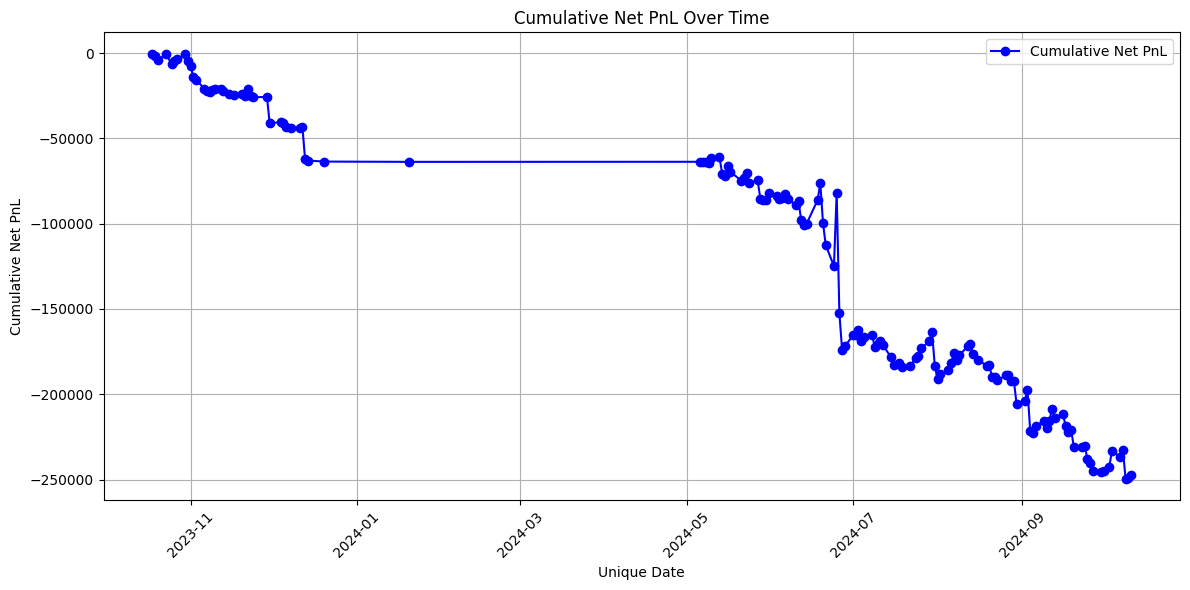

In [22]:
import matplotlib.pyplot as plt

# Assuming new_df is already created as per previous code
plt.figure(figsize=(12, 6))
plt.plot(new_df['Unique Date'], new_df['Cumulative Net PnL'], marker='o', color='b', label='Cumulative Net PnL')
plt.title('Cumulative Net PnL Over Time')
plt.xlabel('Unique Date')
plt.ylabel('Cumulative Net PnL')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()
plt.legend()
plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [25]:
# Save new_df to a CSV file
new_df.to_csv('cumulative_net_pnl.csv', index=False)

2023-10-18 00:00:00
2023-10-19 00:00:00
2023-10-20 00:00:00
2023-10-23 00:00:00
2023-10-25 00:00:00
2023-10-26 00:00:00
2023-10-27 00:00:00
2023-10-30 00:00:00
2023-10-31 00:00:00
2023-11-01 00:00:00
2023-11-02 00:00:00
2023-11-03 00:00:00
2023-11-06 00:00:00
2023-11-07 00:00:00
2023-11-08 00:00:00
2023-11-09 00:00:00
2023-11-10 00:00:00
2023-11-12 00:00:00
2023-11-13 00:00:00
2023-11-15 00:00:00
2023-11-17 00:00:00
2023-11-20 00:00:00
2023-11-21 00:00:00
2023-11-22 00:00:00
2023-11-23 00:00:00
2023-11-24 00:00:00
2023-11-29 00:00:00
2023-11-30 00:00:00
2023-12-04 00:00:00
2023-12-05 00:00:00
2023-12-06 00:00:00
2023-12-08 00:00:00
2023-12-11 00:00:00
2023-12-12 00:00:00
2023-12-13 00:00:00
2023-12-14 00:00:00
2023-12-20 00:00:00
2024-01-20 00:00:00
2024-05-06 00:00:00
2024-05-07 00:00:00
2024-05-08 00:00:00
2024-05-09 00:00:00
2024-05-10 00:00:00
2024-05-13 00:00:00
2024-05-14 00:00:00
2024-05-15 00:00:00
2024-05-16 00:00:00
2024-05-17 00:00:00
2024-05-21 00:00:00
2024-05-22 00:00:00
